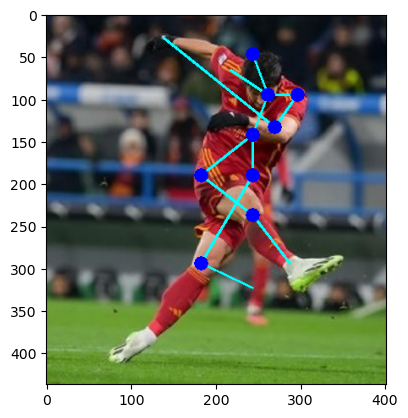

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("sardar.jpg")

protoFile = "pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "pose_iter_160000.caffemodel"

nPoints = 15
POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]

# Load model and Forward Pass
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)
blob = cv2.dnn.blobFromImage(image, 1.0 / 255, (368, 368), (0, 0, 0), swapRB=False, crop=False)
net.setInput(blob)
output = net.forward()

# X and Y Scale
height, width, _ = image.shape
scaleX = width / output.shape[3]
scaleY = height / output.shape[2]

# Empty list to store the detected keypoints
points = []

# Treshold 
threshold = 0.1

for i in range(nPoints):
    # Obtain probability map
    probMap = output[0, i, :, :]
    
    # Find global maxima of the probMap.
    _, prob, _, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = scaleX * point[0]
    y = scaleY * point[1]

    if prob > threshold : 
        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

# Draw skeleton
imSkeleton = image.copy()
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(imSkeleton, points[partA], points[partB], (255, 255,0), 2)
        cv2.circle(imSkeleton, points[partA], 8, (255, 0, 0), thickness=-1, lineType=cv2.FILLED)

plt.imshow(imSkeleton[...,::-1]);